# glassfire.Cluster API example and result visualization
Gaussian Classifier -> Glassfire

Count of total rows: 165000


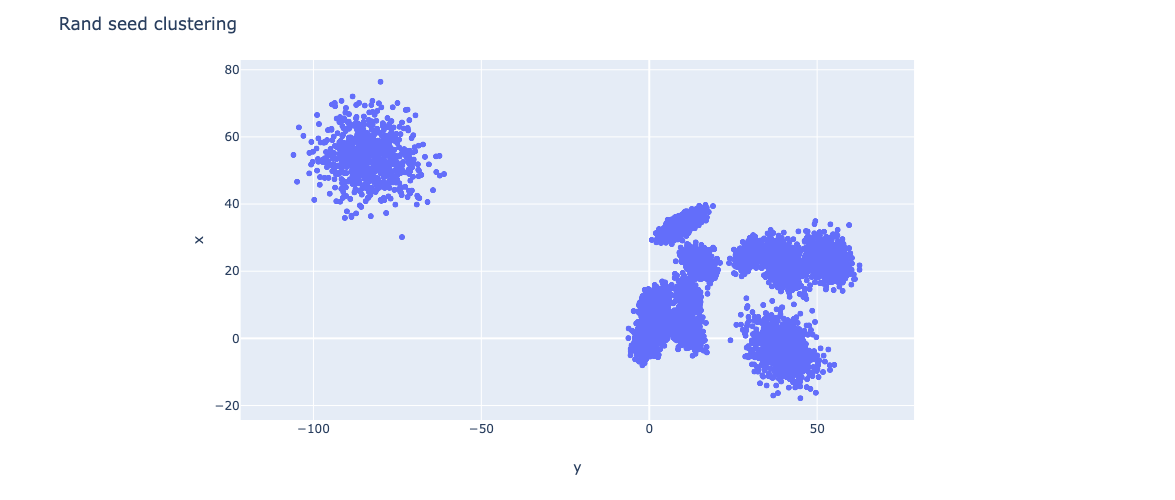

--- Cluster run time 0.5740916728973389 seconds ---


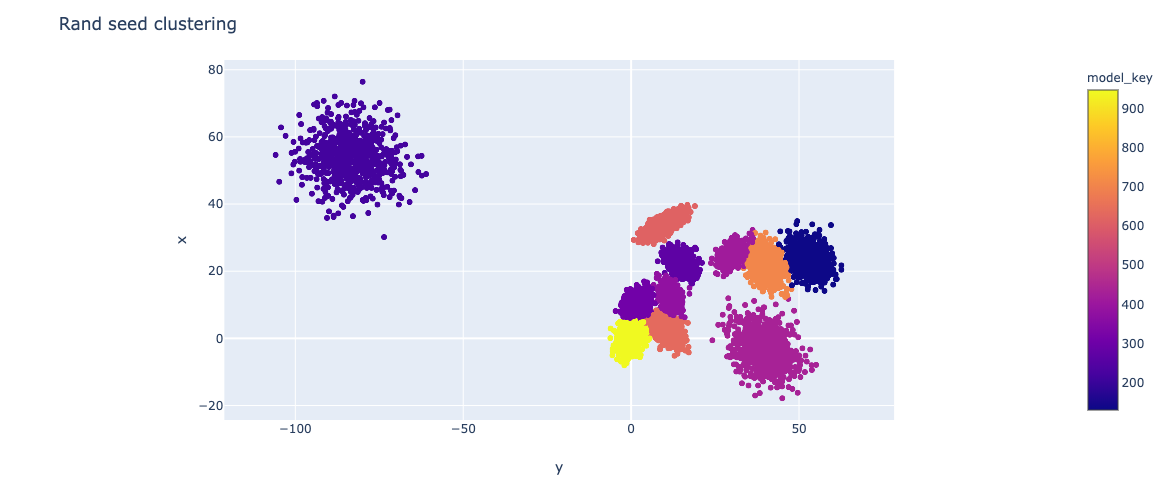

In [2]:
import glassfire
import numpy as np
import pandas as pd
import plotly.express as px

df = pd.read_csv('../data/test.csv')
df.columns = ['idx', 'x', 'y']
print('Count of total rows:', len(df))
dftmp = df.sample(frac=0.05)
dftmp.columns = ['idx', 'x', 'y']

fig = px.scatter(dftmp, x="y", y="x")
fig.update_layout(
    width = 800,
    height = 500,
    title = "Rand seed clustering",
    xaxis = dict(constrain = 'domain'), 
    yaxis = dict(scaleanchor = "x"),
)
fig.show()

import hashlib
def myhash(s):
    return int(hashlib.sha1(s.encode('utf8')).hexdigest(), 16) % (10 ** 3)

import time
start_time = time.time()
cluster = glassfire.Cluster(input=[df['x'], df['y']], info=[], loading_type='col')
cluster.run(10, False)

print("--- Cluster run time %s seconds ---" % (time.time() - start_time))

dftmp['model_key'] = dftmp.apply(lambda x: myhash(cluster.query_model([x.x, x.y], 1)[2].model_key()), axis=1)

fig = px.scatter(dftmp, x="y", y="x", color='model_key')
fig.update_layout(
    width = 800,
    height = 500,
    title = "Rand seed clustering",
    xaxis = dict(constrain = 'domain'), 
    yaxis = dict(scaleanchor = "x")
)
fig.show()